In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
from cluster_fonts import *

In [2]:
features, clusters = make_blobs(n_samples = 1000,
              n_features = 2, 
              centers = 3,
              cluster_std = 0.4,
              shuffle = True)

In [3]:
features.shape, clusters.shape

((1000, 2), (1000,))

In [4]:
df = pd.DataFrame(features)

<AxesSubplot:xlabel='0', ylabel='1'>

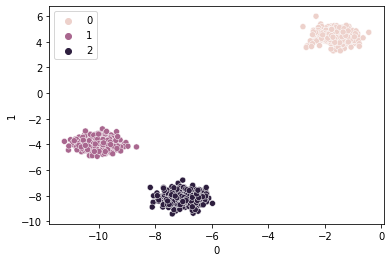

In [5]:
sns.scatterplot(data=df, x=0, y=1, hue = clusters)

In [6]:
model = train_model(df, ModelType.KMeans)

In [7]:
preds = model.predict(df)

<AxesSubplot:xlabel='0', ylabel='1'>

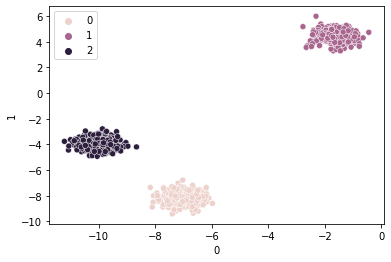

In [8]:
sns.scatterplot(data=df, x=0, y=1, hue = preds)

In [9]:
df = pd.read_csv('means_df.csv')

In [10]:
X = df[df.columns[2:]]

In [27]:
model = train_model(X, ModelType.KMeans)

In [28]:
preds = model.predict(X)

In [29]:
preds = pd.Series(preds).astype(object)

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(X))

In [31]:
df_pca['preds'] = preds

In [32]:
df[0] = df_pca[0]
df[1] = df_pca[1]
df['preds'] = df_pca['preds']

<AxesSubplot:title={'center':'Principal component analysis (PCA) means df VS Clusters'}, xlabel='0', ylabel='1'>

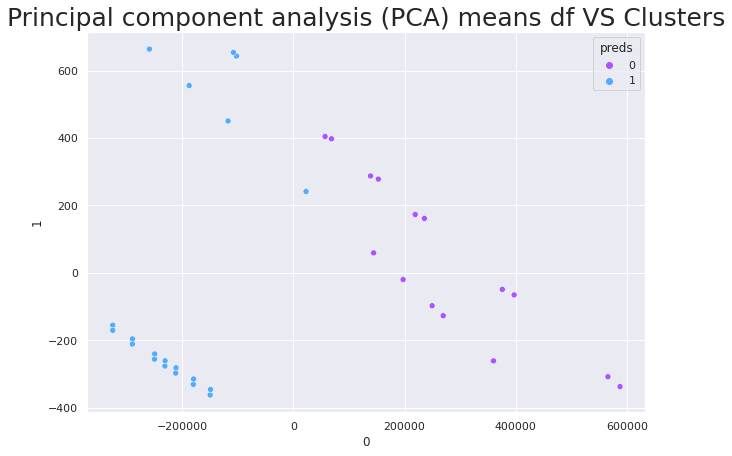

In [33]:
sns.set()
plt.figure(figsize = (10, 7))
plt.title('Principal component analysis (PCA) means df VS Clusters', fontdict={'fontsize': 25})
sns.scatterplot(data=df, x=0, y=1, hue="preds", legend="full", palette = 'cool_r')

<AxesSubplot:title={'center':'Principal component analysis (PCA) means df VS Family'}, xlabel='0', ylabel='1'>

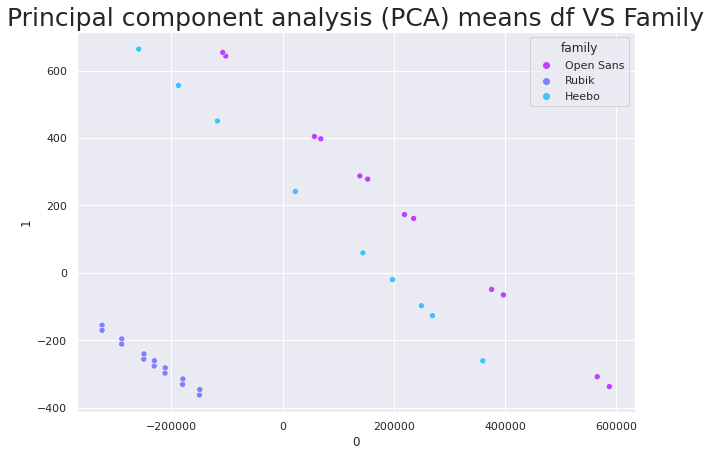

In [34]:
sns.set()
plt.figure(figsize = (10, 7))
plt.title('Principal component analysis (PCA) means df VS Family', fontdict={'fontsize': 25})
sns.scatterplot(data=df, x=0, y=1, hue="family", legend="full", palette = 'cool_r')